**2. Visualizing with SOM (3 points)
Visualize the MNIST-784 handwritten digits dataset with SOM and discuss what you can learn from the visualization.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
from scipy.io import arff

# Load data
data, meta = arff.loadarff("mnist_784.arff")
df = pd.DataFrame(data)
df = df.apply(lambda col: col.map(lambda x: x.decode() if isinstance(x, bytes) else x))

# # X = features, y = target 
X = df.drop(columns=['class']).astype(np.float32)
y = df['class'].astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

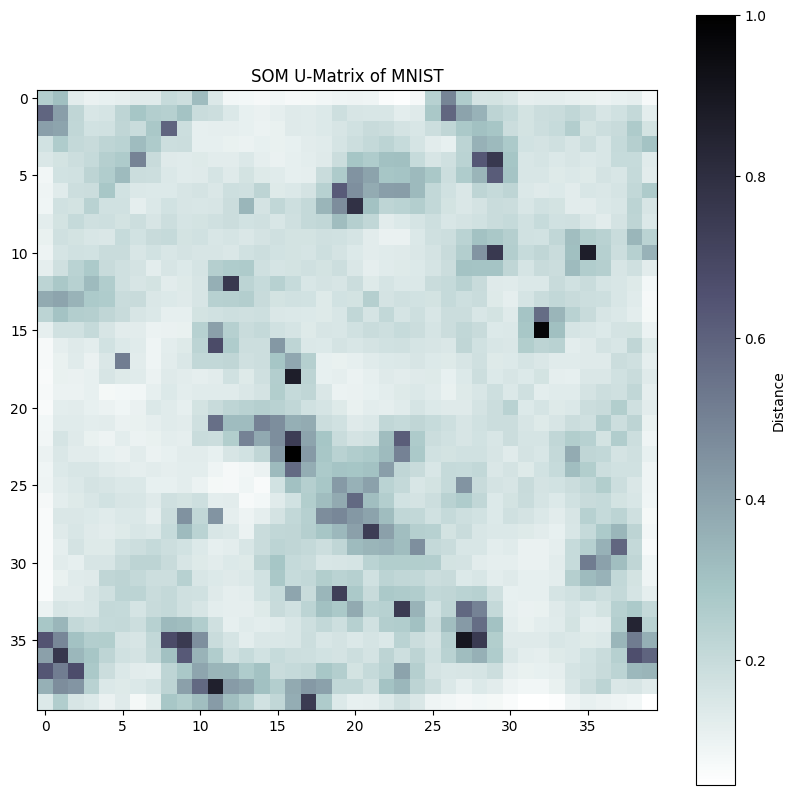

In [ ]:
# Train SOM
som_width, som_height = 40, 40  # 40x40 grid
som = MiniSom(som_height, som_width, X_scaled.shape[1], sigma=1.0, learning_rate=0.5, neighborhood_function='gaussian', random_seed=42)
som.random_weights_init(X_scaled)
som.train_random(X_scaled, 40000)  # 40k iterations

# Visualize U-Matrix
plt.figure(figsize=(10,10))
u_matrix = som.distance_map().T  
plt.imshow(u_matrix, cmap='bone_r')
plt.colorbar(label='Distance')
plt.title('SOM U-Matrix of MNIST')
plt.show()

Clusters of similar data points appear as dark spots in the plot. The lighter areas around the dark spots are the boundaries of the clusters separating them from each other. Comparing the different clusters in the plot their similarity to each other is indicated by how close they are to each other. Singular dark spots far away from any clusters may indicate outlier values.